# How to use bbhelp

In [2]:
import bbhelp as bb

# Specify paths
images_folder = r'C:\Users\User\Documents\dataset\pfas\34759_final_project_rect\seq_02\image_02\data'
labels_file = r'C:\Users\User\Documents\dataset\pfas\34759_final_project_rect\seq_02\labels.txt'

# Display Single Image with Bounding Boxes or Centers
 
The `display_image` function allows us to view a specific image with bounding boxes or just the object centers.
 
- **Image Index**: Set the image number you want to view.
- **Display Type**: Choose `'bbox'` for bounding boxes or `'center'` for centers only.


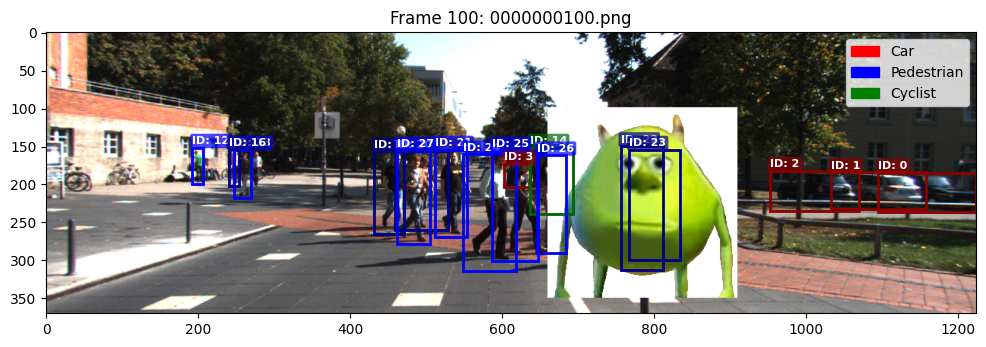

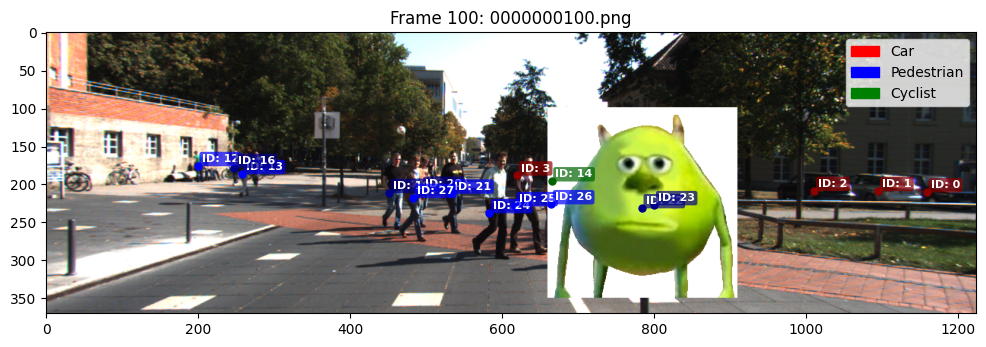

In [3]:
# Display the image with bounding boxes
image_index = 100
bb.display_image(image_index, images_folder, labels_file, display_type='bbox')

# Display the image with centers
bb.display_image(image_index, images_folder, labels_file, display_type='center')

# Extract Specific Information from Image Labels

The `get_track_info` function retrieves specific details about objects in an image using the `track_id`.

- **Parameters**:
  - `track_id`: The ID of the object to locate.
  - `image_index`: The index of the image (frame number).
  - `item_key`: The property to retrieve, such as `'center'`, `'bbox'`, or `'location'`.
 
Let's retrieve the center and location of an object with a specific `track_id`.

In [4]:
# Define the parameters
track_id = 27
item_key = 'center'  # Fetch the 'center' property
center = bb.get_track_info(track_id, image_index, labels_file, item_key)
print("Center:", center)

# Retrieve location
item_key = 'location'
location = bb.get_track_info(track_id, image_index, labels_file, item_key)
print("Location:", location)

Center: [482.771089, 217.420804]
Location: [-1.984115, 1.473912, 11.233839]


# Extract All Available Information for a Given Track ID
 
Below is an example of retrieving all possible properties for a specific `track_id` in a selected `image_index`.
 
Available item keys:
- `'center'`, `'bbox'`, `'type'`, `'track_id'`, `'truncated'`, `'occluded'`, `'alpha'`, `'dimensions'`, `'location'`, `'rotation_y'`, `'score'`


In [5]:
# Define parameters
track_id = 27
image_index = 100  # Change this index as needed for testing

# List of available item keys
item_keys = ['center', 'bbox', 'type', 'track_id', 'truncated', 'occluded', 'alpha', 
             'dimensions', 'location', 'rotation_y', 'score']

# Retrieve and print each item key's value
for item_key in item_keys:
    value = bb.get_track_info(track_id, image_index, labels_file, item_key)
    print(f"{item_key}: {value}")

center: [482.771089, 217.420804]
bbox: [461.27109, 155.921082, 504.271088, 278.920526]
type: Pedestrian
track_id: 27
truncated: 0.0
occluded: 0
alpha: 0.975491
dimensions: [1.842834, 0.786014, 1.032461]
location: [-1.984115, 1.473912, 11.233839]
rotation_y: 0.807253
score: None


# Display All Images as Video
 
The `display_images_as_video` function allows you to view all images in the folder as a continuous video with bounding boxes or centers.
 
- **Parameters**:
  - `frame_delay`: Sets the delay between frames in milliseconds. Adjust as needed for smooth playback.
  - `display_type`: Choose `'bbox'` to display bounding boxes or `'center'` to display centers only.
  - **Note**: Press 'q' to stop the video playback.

In [6]:
# Display all images as video with bounding boxes
bb.display_images_as_video(images_folder, labels_file, frame_delay=100, display_type='bbox')

# Display all images as video with centers only
bb.display_images_as_video(images_folder, labels_file, frame_delay=100, display_type='center')

# Anonymize Track IDs in Labels
 
The `anonymize_track_ids` function creates a new labels file where all `track_id`s are replaced with "??".
This can be useful for data anonymization purposes.
 
- **Input**: Path to the original labels file.
- **Output**: A new labels file with anonymized track IDs.

In [7]:
# Anonymize track IDs
anonymized_labels_file = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\anonymized_labels'

# Anonymize track IDs
bb.anonymize_track_ids(labels_file, anonymized_labels_file)

New labels file with anonymized track IDs created: C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\anonymized_labels


After running the cell above, a prompt will appear to enter the name for the new labels file with anonymized track IDs.
Use this file in further demonstrations to verify anonymization.

In [8]:
# Display an anonymized image to check
labels_file_anonymized = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\anonymized_labels'
image_index = 100

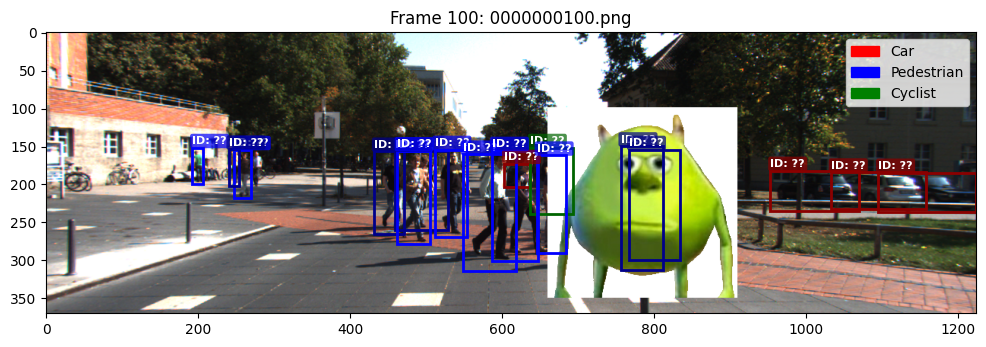

In [9]:
# Display the anonymized image with bounding boxes
bb.display_image(image_index, images_folder, labels_file_anonymized)

In [10]:
# Display video with centers only from anonymized labels
bb.display_images_as_video(images_folder, labels_file_anonymized, frame_delay=200, display_type='center')

# Create Artificial Occlusions in Labels
 
The `create_obstructed_labels_complex` function removes specified track IDs from the labels file within specific frame ranges.
This simulates occlusions by making selected objects "disappear" for a defined period.
 
- **Parameters**:
  - `obstruction_data`: A dictionary where keys are `track_id`s and values are tuples of `(start_frame, end_frame)`.
  - **Example**: `{5: (0, 20), 6: (0, 20), 7: (35, 55)}`

After running the function, a prompt will appear to enter the name for the new labels file with occlusions.


In [42]:
# Define the obstruction data for simulation
# Format: {track_id: (start_frame, end_frame)}
obstruction_data = {
    5: (0, 20),  # Track ID 5 will be obstructed from frame 0 to 20
    6: (0, 20),  # Track ID 6 will be obstructed from frame 0 to 20
    7: (35, 55),  # Track ID 7 will be obstructed from frame 35 to 55
    23: (80, 110), # Track ID 23 will be obstructed from frame 80 to 110
    26: (100, 120), # Track ID 26 will be obstructed from frame 100 to 120
    22: (80, 110), # Track ID 22 will be obstructed from frame 80 to 110
    14: (100, 130) # Track ID 14 will be obstructed from frame 100 to 130
}

# Define the labels file with obstructed labels
obstructed_labels_file = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\obstructed_labels'

# Create the obstructed labels file
bb.create_obstructed_labels_complex(labels_file, obstruction_data, obstructed_labels_file)

New labels file created: C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\obstructed_labels


In [43]:
# Display video with bounding boxes from obstructed labels
bb.display_images_as_video(images_folder, obstructed_labels_file, frame_delay=20, display_type='bbox')

## 2D trajectories

The `plot_trajectories_on_initial_frame` function overlays the center trajectories of bounding boxes for specified track IDs on the initial frame of the sequence. This provides a visual representation of how objects have moved over time.

### Parameters:
- **labels_file**: Path to the `labels.txt` file containing bounding box information.
- **images_folder**: Path to the folder containing the sequence images.
- **track_ids**: A list of track IDs to plot. If `None`, it will plot all available track IDs.

### Key Features:
- The initial frame is darkened and used as a background for better visibility.
- Unique colors are assigned to each track ID for distinction.
- A legend is included to associate each track ID with its corresponding trajectory color.

### Example:
Below, we plot the trajectories for track IDs 14, 16, and 26.

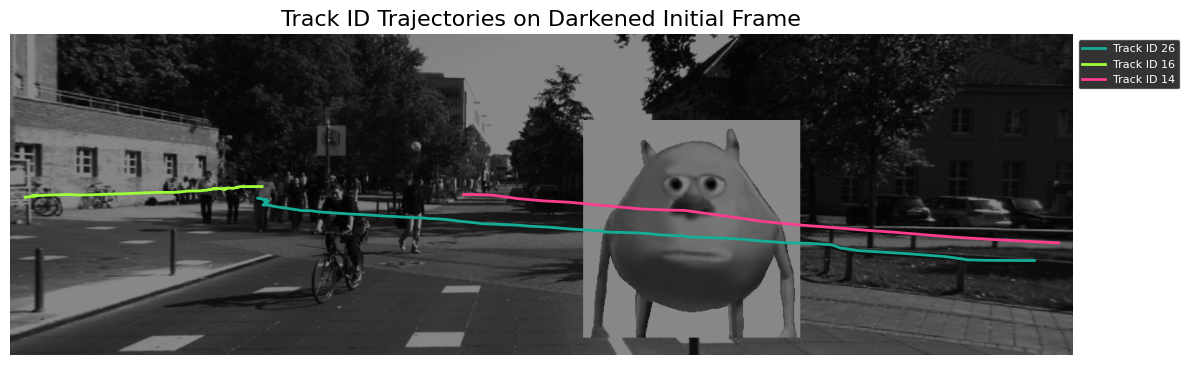

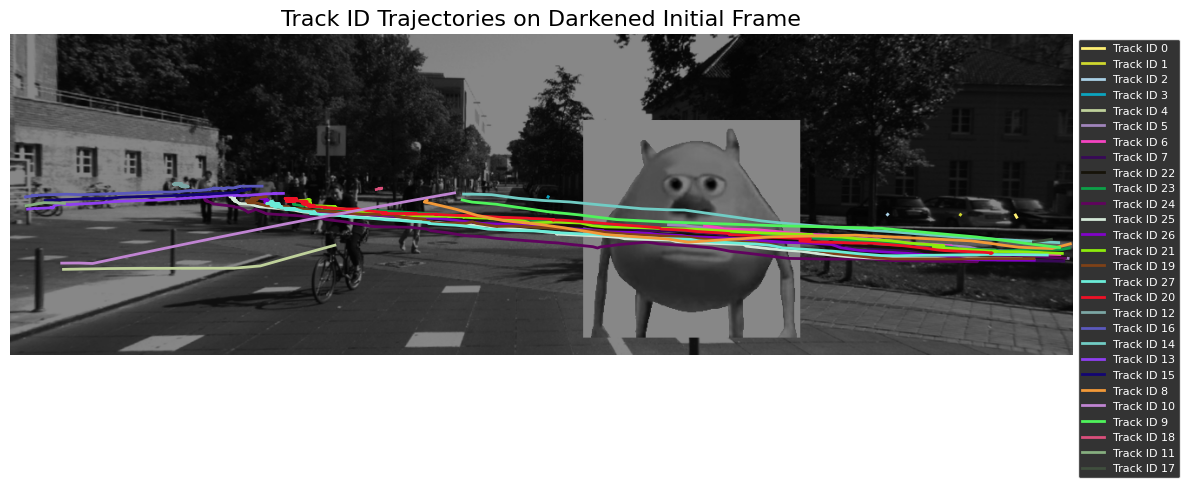

In [13]:
# Plot trajectories for specific track IDs
selected_track_ids = [14, 16, 26]
bb.plot_trajectories_on_initial_frame(labels_file, images_folder, track_ids=selected_track_ids)

# Plot trajectories for all track IDs
bb.plot_trajectories_on_initial_frame(labels_file, images_folder)

# 3D trajectories

The `plot_trajectories_in_3d_interactive` function provides an interactive visualization of object trajectories in 3D space using the `location` data from the `labels.txt` file. This allows a detailed exploration of how objects move across frames in a three-dimensional environment.

### Parameters:
- **labels_file**: Path to the `labels.txt` file containing bounding box and location information.
- **track_ids** (optional): A list of track IDs to plot. If not provided, the function will plot trajectories for all track IDs.

### Key Features:
- **Interactive Plot**:
  - Zoom, pan, and rotate to explore trajectories from different angles.
- **Color-Coded Trajectories**:
  - Unique colors are assigned to each track ID for easy differentiation.
- **Start and End Markers**:
  - Start points are displayed as green circles.
  - End points are marked with red "X" symbols.
- **Hover Information**:
  - Shows detailed information including:
    - Frame number.
    - X, Y, and Z coordinates.
- **Customizable Axes**:
  - X and Z coordinates are plotted on the horizontal plane.
  - Y is treated as the vertical axis.

In [14]:
# Specify the track IDs to plot
selected_track_ids = [14, 16, 26]
bb.plot_trajectories_in_3d_interactive(labels_file, track_ids=selected_track_ids)

In [15]:
# Plot trajectories for all available track IDs
bb.plot_trajectories_in_3d_interactive(labels_file)

# Create track_id from anonymized track_ids

The `recreate_track_ids_greedy` function restores track IDs in a consistent manner from an anonymized labels file, ensuring spatial consistency across frames. It assigns track IDs to objects based on proximity and guarantees that each track ID corresponds to only one object.

## Parameters:
- **anonymized_labels_file**: Path to the labels file with anonymized track IDs (`"??"`).
- **output_labels_file**: Path to save the output file with recreated track IDs.
- **max_distance**: Maximum distance (in pixels) to consider two centers as the same object. Default is 50.
- **frame_gap**: Maximum number of frames a track ID can remain unmatched before being removed. Default is 2.

## Key Features:
- **Spatial Consistency**:
  - Matches objects to the closest track ID in a greedy manner.
  - Ensures no two objects share the same track ID within a single frame.
- **New Track IDs**:
  - Assigns new track IDs to objects that cannot be matched to existing tracks.
- **Track Management**:
  - Tracks are removed if they remain unmatched for more than `frame_gap` frames.

In [16]:
# Input and output file paths
anonymized_labels_file = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\anonymized_labels'
output_labels_file = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\recreated_labels.txt'

# Recreate track IDs with spatial consistency
bb.recreate_track_ids_greedy(anonymized_labels_file, output_labels_file, max_distance=50, frame_gap=2)


Track IDs recreated and saved to C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\recreated_labels.txt


In [17]:
recreated_labels_file = r'C:\Users\User\Documents\GitHub\pfas_finalproject\helper_function\recreated_labels.txt'

# Display all images as video with bounding boxes
bb.display_images_as_video(images_folder, recreated_labels_file, frame_delay=200, display_type='bbox')

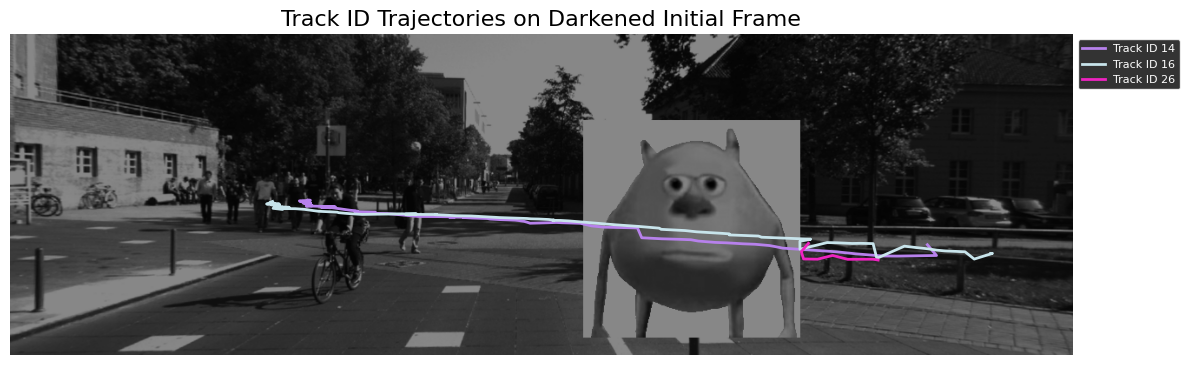

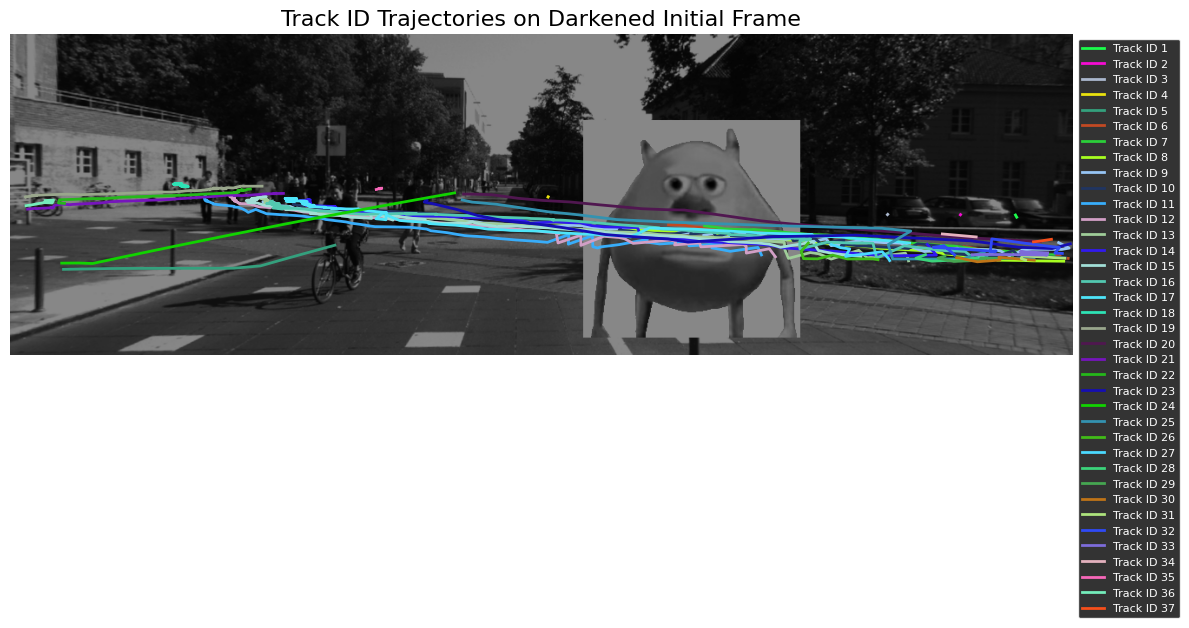

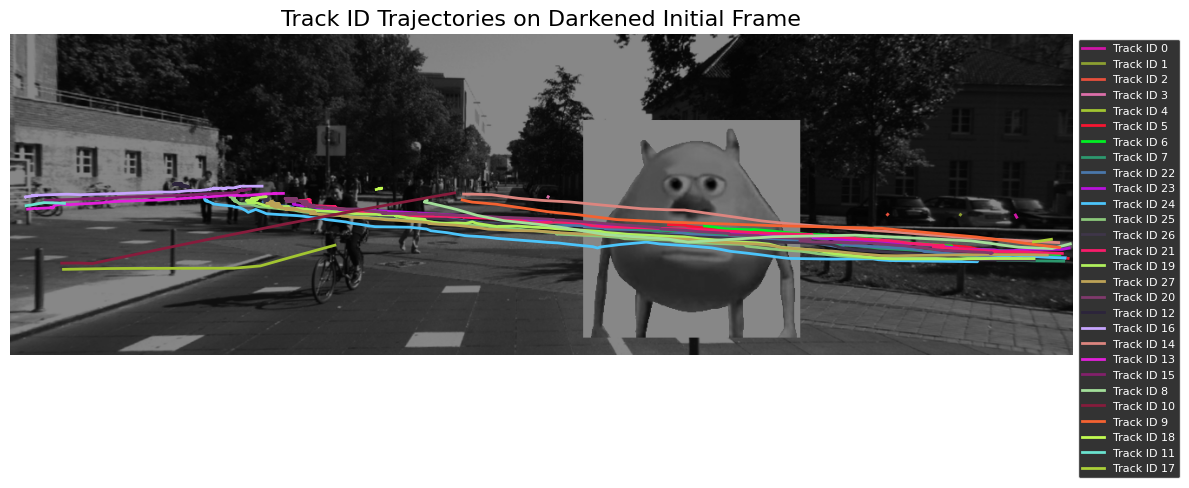

In [18]:
# Plot trajectories for specific track IDs
selected_track_ids = [14, 16, 26]
bb.plot_trajectories_on_initial_frame(recreated_labels_file, images_folder, track_ids=selected_track_ids)

# Plot trajectories for all track IDs
bb.plot_trajectories_on_initial_frame(recreated_labels_file, images_folder)
bb.plot_trajectories_on_initial_frame(labels_file, images_folder)